In [1]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn import metrics
from matplotlib import style
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

In [2]:
car_data = pd.read_csv('car data.csv')
car_data.head()

,Car_Name,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner
0,ritz,2014,3.35,5.59,27000,Petrol,Dealer,Manual,0
1,sx4,2013,4.75,9.54,43000,Diesel,Dealer,Manual,0
2,ciaz,2017,7.25,9.85,6900,Petrol,Dealer,Manual,0
3,wagon r,2011,2.85,4.15,5200,Petrol,Dealer,Manual,0
4,swift,2014,4.60,6.87,42450,Diesel,Dealer,Manual,0


In [3]:
car_data.columns
print(car_data['Fuel_Type'].value_counts())

Petrol    239
Diesel     60
CNG         2
Name: Fuel_Type, dtype: int64


In [4]:
print(car_data['Seller_Type'].value_counts())

Dealer        195
Individual    106
Name: Seller_Type, dtype: int64


In [5]:
print(car_data['Transmission'].value_counts())

Manual       261
Automatic     40
Name: Transmission, dtype: int64


In [6]:
fuel_type = car_data['Fuel_Type']
seller_type = car_data['Seller_Type']
transmission_type = car_data['Transmission']
selling_price = car_data['Selling_Price']

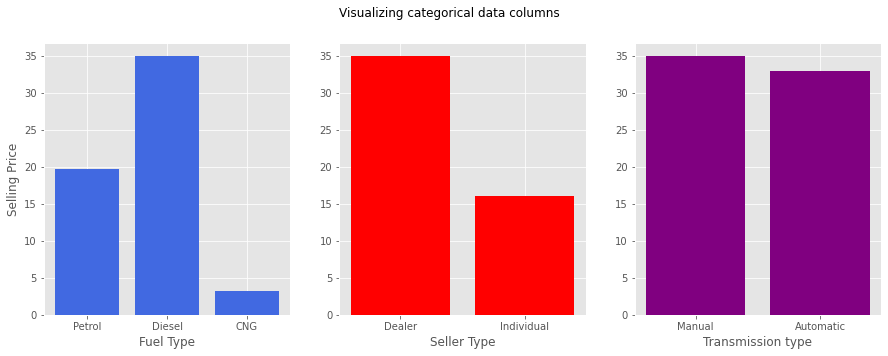

In [7]:
style.use('ggplot')
fig = plt.figure(figsize=(15,5))
fig.suptitle('Visualizing categorical data columns')
plt.subplot(1,3,1)
plt.bar(fuel_type,selling_price, color='royalblue')
plt.xlabel("Fuel Type")
plt.ylabel("Selling Price")
plt.subplot(1,3,2)
plt.bar(seller_type, selling_price, color='red')
plt.xlabel("Seller Type")
plt.subplot(1,3,3)
plt.bar(transmission_type, selling_price, color='purple')
plt.xlabel('Transmission type')
plt.show()

<AxesSubplot:xlabel='Transmission', ylabel='Selling_Price'>

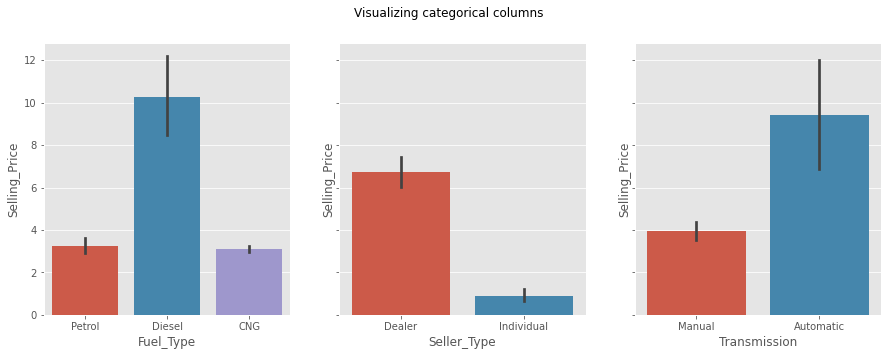

In [8]:
fig, axes = plt.subplots(1,3,figsize=(15,5), sharey=True)
fig.suptitle('Visualizing categorical columns')
sns.barplot(x=fuel_type, y=selling_price, ax=axes[0])
sns.barplot(x=seller_type, y=selling_price, ax=axes[1])
sns.barplot(x=transmission_type, y=selling_price, ax=axes[2])

In [9]:
petrol_data = car_data.groupby('Fuel_Type').get_group('Petrol')
seller_data = car_data.groupby('Seller_Type').get_group('Dealer')

In [10]:

car_data.replace({'Fuel_Type':{'Petrol':0, 'Diesel':1, 'CNG':2}}, inplace=True)

car_data = pd.get_dummies(car_data, columns=['Seller_Type', 'Transmission'], drop_first=True)

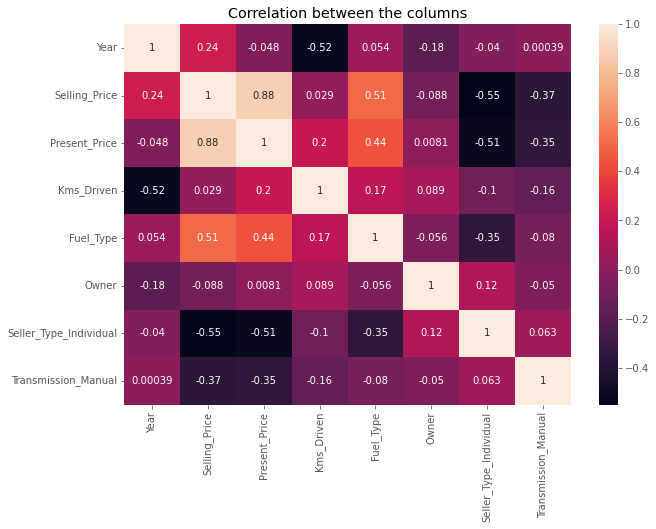

In [11]:
plt.figure(figsize=(10,7))
sns.heatmap(car_data.corr(), annot=True)
plt.title('Correlation between the columns')
plt.show()

In [12]:
X = car_data.drop(['Car_Name','Selling_Price'], axis=1)
y = car_data['Selling_Price']
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.3, random_state=42)
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [13]:
model = LinearRegression()
model.fit(X_train, y_train)
pred = model.predict(X_test)
print(pred)
print("MAE: ", (metrics.mean_absolute_error(pred, y_test)))
print("MSE: ", (metrics.mean_squared_error(pred, y_test)))
print("R2 score: ", (metrics.r2_score(pred, y_test)))

[ 2.84503948  8.17433042  6.15503229 -1.53474297  9.10478102  7.12513416
  1.41208877  0.85727713  1.42824591  7.18732696  8.77738476  0.64604862
  8.19199294  3.27496701  6.58156734  3.12524913  0.47776322 10.71519858
  1.81845542  2.3948969   0.40800604  7.78763597  6.25976337  2.59710749
  0.8401473   3.68243396  5.30447357  2.81900104  2.20840021  1.82500826
  0.41732684  8.85691122 -0.6636885   2.2707602   8.2948583   4.51208942
  7.29749227  7.54243321  2.9482584   7.9275823   3.90745022  4.17258578
  4.31519575  0.69858995  7.02594603  0.53398622  7.32449179 11.09649499
  3.13148761  5.06495644  6.60928574  2.2345092  20.15115757 16.47662698
  7.25913588  9.54127202  4.43952683  8.67649783  1.75283042  7.41244863
  0.27553659 -2.53278607  2.01366813 -1.56020807  4.79226982  1.86019863
 19.80408464 17.88217176  5.42372796 -0.54547666  4.72003976  5.22111346
  5.6621309   4.97677196  2.71257553  1.71777574  1.96079562  9.74963166
  0.88461411  7.7636878   4.48760197  3.32550773  4

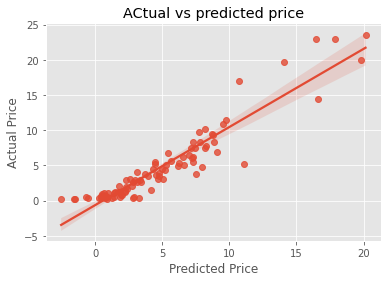

In [14]:
sns.regplot(x=pred, y=y_test)
plt.xlabel("Predicted Price")
plt.ylabel('Actual Price')
plt.title("ACtual vs predicted price")
plt.show()

In [15]:
car_data.head()

,Car_Name,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Owner,Seller_Type_Individual,Transmission_Manual
0,ritz,2014,3.35,5.59,27000,0,0,0,1
1,sx4,2013,4.75,9.54,43000,1,0,0,1
2,ciaz,2017,7.25,9.85,6900,0,0,0,1
3,wagon r,2011,2.85,4.15,5200,0,0,0,1
4,swift,2014,4.60,6.87,42450,1,0,0,1
